In [47]:
from pandas import DataFrame
import numpy as np
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from IPython.display import Image 
import time


In [15]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

#doc du lieu va chia du lieuj thanh 2 truoung 
df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])


X = df[['Interest_Rate','Unemployment_Rate']] 

X = sc.fit_transform(X)
Y = df['Stock_Index_Price']
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

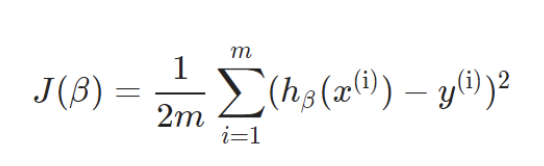

In [16]:
Image("cost.png")

In [17]:
#MSE
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

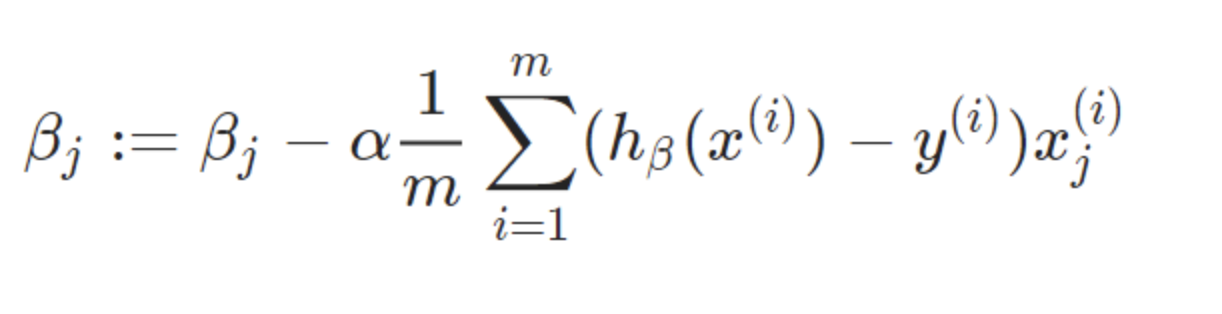

In [18]:
Image("gradient_des.png")

In [33]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
    # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        if np.abs(cost_history[iteration]-cost_history[iteration-1]) < 1e-4:
            print('stop after :',iteration)
            break
    return B, cost_history

In [48]:
B = np.zeros(Xbar.shape[1])
alpha = 0.005
iter_ = 2000

start_time = time.time()
newB, cost_history = gradient_descent(Xbar, Y, B, alpha, iter_)
print("Thoi gian chay --- %s seconds ---" % (time.time() - start_time))


Thoi gian chay --- 1.2357778549194336 seconds ---


In [36]:
Xbar.shape

(24, 3)

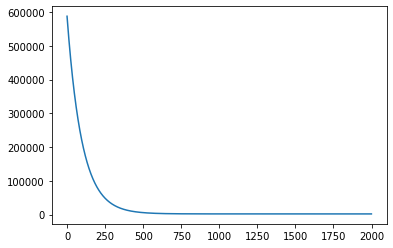

Predicted Stock Index Price: 
 [[895.14323247]]


In [44]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.show()
# %%
def predict(w,X_new):
    return w[0] + np.matrix(X_new)*np.matrix(w[1:]).T
    
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', predict(newB,[[New_Interest_Rate ,New_Unemployment_Rate]]))